# Piecewise Aggregate Approximation
We're going to treat a continuous series $C$ of length `n` as a vector, where we reduce the `n` dimensions to `w` by splitting it up into equally sized frames.

$\bar{C_i} = \frac{w}{n} \sum_{j=\frac{n}{w}(i-1)+1}^{\frac{n}{w}i} c_j$

Below is my implementation — I checked it by using `tslearn.piecewise.PiecewiseAggregateApproximation`

In [101]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn")
%matplotlib inline

In [139]:
def paa(X, n_segments, plot=False):
    """
    piecewise aggregate approximation 
    """
    n = X.shape[0]
    w = n_segments
    window_size = n // w
    # output with be of size w
    reduced = np.zeros((w, 1))

    # the next 3 lines are all that matter
    for i in range(1, w+1):
        j, k = int(n/w) * (i - 1), int(n/w) * i 
        reduced[i-1] = (w/n) * np.sum(X[j:k]) 
        
    # stretch out values to be the same shape as X
    inv = np.zeros((X.shape[0]))
    for i in range(len(reduced)):
        inv[i*window_size:(i+1)*window_size] = reduced[i]
        
    if plot:
        plt.plot(X, alpha=0.5)
        plt.plot(inv);
        plt.show()
    
    return reduced, inv

In [140]:
n_samples, window_size, n_segments, n_symbols = 100, 6, 100 // 6, 8
rng = np.random.RandomState(42)
X = rng.randn(n_samples)

Their implementation

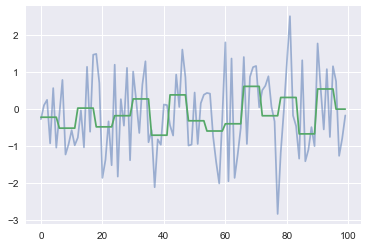

In [141]:
from tslearn.piecewise import PiecewiseAggregateApproximation

PAA = PiecewiseAggregateApproximation(n_segments=n_segments)
X_paa = PAA.inverse_transform(PAA.fit_transform(X))
plt.plot(X, alpha=0.5);
plt.plot(X_paa[0].ravel());

My implementation

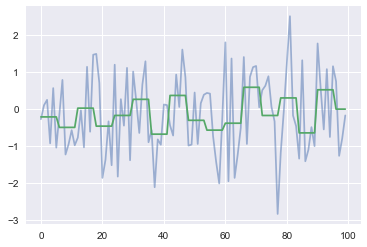

In [142]:
breakpoints, inverse = paa(X, n_samples//window_size, True)

### Resources:
* [Probabilistic Discovery of Time Series Motifs](https://www.cs.ucr.edu/~eamonn/SIGKDD_Motif.pdf)
* [pyts docs](https://pyts.readthedocs.io/en/latest/auto_examples/approximation/plot_paa.html)